## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [3]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [4]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [5]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [6]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [7]:
cat = ['home','martial','records','job']
num = ['seniority','time','age','expenses', 'income', 'assets', 'debt', 'amount', 'price','default']
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int32
dtype: object

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=1)


y_train  = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values


del df_train['default']
del df_test['default']
del df_val['default']


df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
len(df_train), len(df_test), len(df_val), len(y_test), len(y_val), len(y_train)

(2850, 891, 713, 891, 713, 2850)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [11]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
seniority,9,17,10,0,0,1,29,9,0,0
home,rent,rent,owner,rent,rent,owner,owner,parents,owner,parents
time,60,60,36,60,36,60,60,12,60,48
age,30,58,46,24,26,36,44,27,32,41
marital,married,widow,married,single,single,married,married,single,married,married
records,no,no,yes,no,no,no,no,no,no,no
job,freelance,fixed,freelance,fixed,fixed,fixed,fixed,fixed,freelance,partime
expenses,73,48,90,63,46,75,75,35,90,90
income,129,131,200,182,107,214,125,80,107,80
assets,0,0,3000,2500,0,3500,10000,0,15000,0


In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [13]:
roc_auc_score(y_train, df_train.time)

0.5615415808350418

In [14]:
roc_auc_score(y_train, -df_train.seniority)

0.705547271410607

In [15]:
fpr, tpr, _ = roc_curve(y_train, -df_train.seniority)

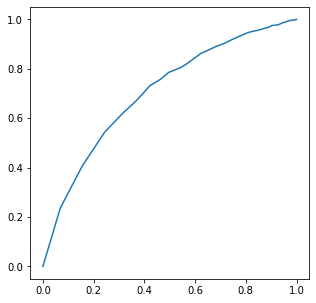

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)

C:\Users\adeju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adeju\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seniority', ylabel='Density'>

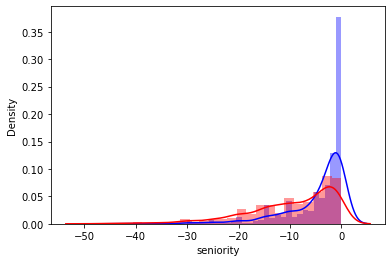

In [17]:
sns.distplot(-df_train.seniority[y_train == 1], color='blue')
sns.distplot(-df_train.seniority[y_train == 0], color='red')

In [48]:
for c in num:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print(c, auc)

seniority 0.705547271410607
time 0.5615415808350418
age 0.5697789703140826
expenses 0.5015186692958463
income 0.674563481966796
assets 0.6448650262020912
debt 0.5051067778033301
amount 0.5944773771486449
price 0.5045483625527835
default 1.0


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

answer: `seniority`

From the assignment correction ROC curve for seniority was plot

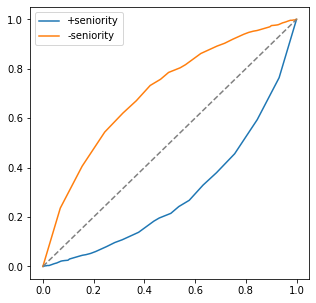

In [49]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.seniority)
plt.plot(fpr, tpr, label='+seniority')

fpr, tpr, _ = roc_curve(y_train, -df_train.seniority)
plt.plot(fpr, tpr, label='-seniority')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [50]:
df_new = df.copy()

In [51]:
feature = ['seniority','home','records','job','income','assets']

In [52]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [53]:
dv = DictVectorizer(sparse=True)

train_dict = df_train[feature].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [54]:
val_dict = df_val[feature].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
#churn_decision = (y_pred >= 0.5)
#(y_val == churn_decision).mean()

In [55]:
roc_auc_score(y_val, y_pred)

0.8256212256212256

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [56]:
from sklearn.metrics import auc

In [57]:
roc_auc_score(y_val, y_pred).round(3)

0.826

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [58]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [59]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [60]:
df_scores.head()

,threshold,tp,fp,fn,tn
0,0.00,195,518,0,0
1,0.01,195,511,0,7
2,0.02,193,500,2,18
3,0.03,192,483,3,35
4,0.04,192,462,3,56


In [61]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r
0,0.0,195,518,0,0,0.273492,1.000000
10,0.1,187,360,8,158,0.341865,0.958974
20,0.2,174,216,21,302,0.446154,0.892308
30,0.3,150,122,45,396,0.551471,0.769231
40,0.4,112,68,83,450,0.622222,0.574359
50,0.5,87,40,108,478,0.685039,0.446154
60,0.6,51,25,144,493,0.671053,0.261538
70,0.7,25,12,170,506,0.675676,0.128205
80,0.8,15,6,180,512,0.714286,0.076923
90,0.9,2,1,193,517,0.666667,0.010256


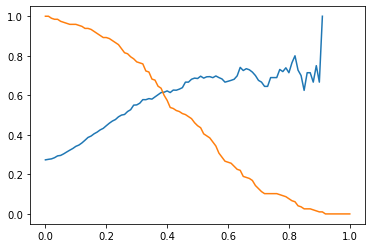

In [62]:
plt.plot(df_scores.threshold, df_scores.p)
plt.plot(df_scores.threshold, df_scores.r)
plt.show()

answer: `0.4`

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [63]:
df_scores['F1'] = 2 * df_scores.p * df_scores.r/ (df_scores.p + df_scores.r)
df_scores['F1']

0      0.429515
1      0.432852
2      0.434685
3      0.441379
4      0.452297
         ...   
96          NaN
97          NaN
98          NaN
99          NaN
100         NaN
Name: F1, Length: 101, dtype: float64

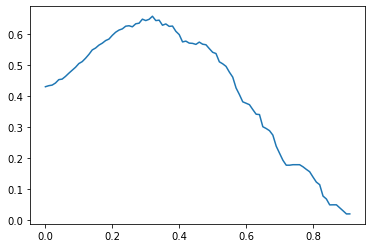

In [64]:
plt.plot(df_scores.threshold, df_scores.F1)

In [65]:
df_scores.iloc[df_scores.F1.argmax()]

threshold      0.320000
tp           148.000000
fp           108.000000
fn            47.000000
tn           410.000000
p              0.578125
r              0.758974
F1             0.656319
Name: 32, dtype: float64

answer `0.3`

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [72]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[feature].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[feature].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [73]:
from sklearn.model_selection import KFold

In [78]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:

    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('%s: %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

0.01: 0.808 +- 0.012
0.1: 0.813 +- 0.014
1: 0.814 +- 0.015
10: 0.814 +- 0.015


answer: **1, 10**

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

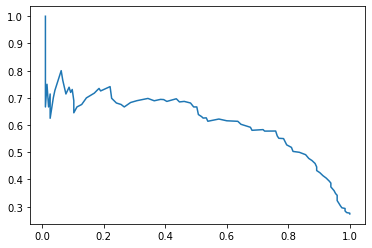

In [79]:
plt.plot(df_scores.r, df_scores.p)

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.